In [1]:
# load packages
import pandas as pd
import numpy as np
import networkx as nx
# import packages to set up bipartite graph
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
import random
import movecolumn as mc
from scipy import stats
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nodes_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%202/Resources/edges.csv'
edges_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%202/Resources/hero-network.csv'
network_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%202/Resources/nodes.csv' 

# extract data
nodes_raw = pd.read_csv(nodes_url)
edges_raw = pd.read_csv(edges_url)
network_raw = pd.read_csv(network_url)

In [3]:
nodes_raw

hero     comic
0      24-HOUR MAN/EMMANUEL    AA2 35
1      3-D MAN/CHARLES CHAN     AVF 4
2      3-D MAN/CHARLES CHAN     AVF 5
3      3-D MAN/CHARLES CHAN     COC 1
4      3-D MAN/CHARLES CHAN    H2 251
...                     ...       ...
96099                 ZZZAX    H2 326
96100                 ZZZAX    H2 327
96101                 ZZZAX  M/CP 8/4
96102                 ZZZAX     PM 47
96103                 ZZZAX   WCA2 12

[96104 rows x 2 columns]

In [4]:
edges_raw

hero1                 hero2
0              LITTLE, ABNER        PRINCESS ZANDA
1              LITTLE, ABNER  BLACK PANTHER/T'CHAL
2       BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3              LITTLE, ABNER        PRINCESS ZANDA
4              LITTLE, ABNER  BLACK PANTHER/T'CHAL
...                      ...                   ...
574462  COLOSSUS II/PETER RA              CALLISTO
574463              CALLISTO               ROGUE /
574464              CALLISTO              CALIBAN/
574465              CALIBAN/               ROGUE /
574466  HULK/DR. ROBERT BRUC     MARKS, DR. SHIELA

[574467 rows x 2 columns]

In [5]:
network_raw

node   type
0                   2001 10  comic
1                    2001 8  comic
2                    2001 9  comic
3      24-HOUR MAN/EMMANUEL   hero
4      3-D MAN/CHARLES CHAN   hero
...                     ...    ...
19085           ZOTA, CARLO   hero
19086                  ZOTA   hero
19087                 ZURAS   hero
19088                  ZURI   hero
19089                 ZZZAX   hero

[19090 rows x 2 columns]

In [6]:
nodes_profile = ProfileReport(nodes_raw, title="Nodes Profiling Report")

In [7]:
nodes_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
edges_profile = ProfileReport(edges_raw, title="Edges Profiling Report")

In [9]:
edges_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
network_profile = ProfileReport(network_raw, title="Network Profiling Report")

In [11]:
network_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
Thor = edges_raw[edges_raw['hero1']=='THOR/DR. DONALD BLAK'].sample(25)
Cap = Subset = edges_raw[edges_raw['hero1']=='CAPTAIN AMERICA'].sample(25)
IronMan = edges_raw[edges_raw['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)

In [13]:
Subset = pd.concat([Thor,Cap,IronMan],axis = 0)

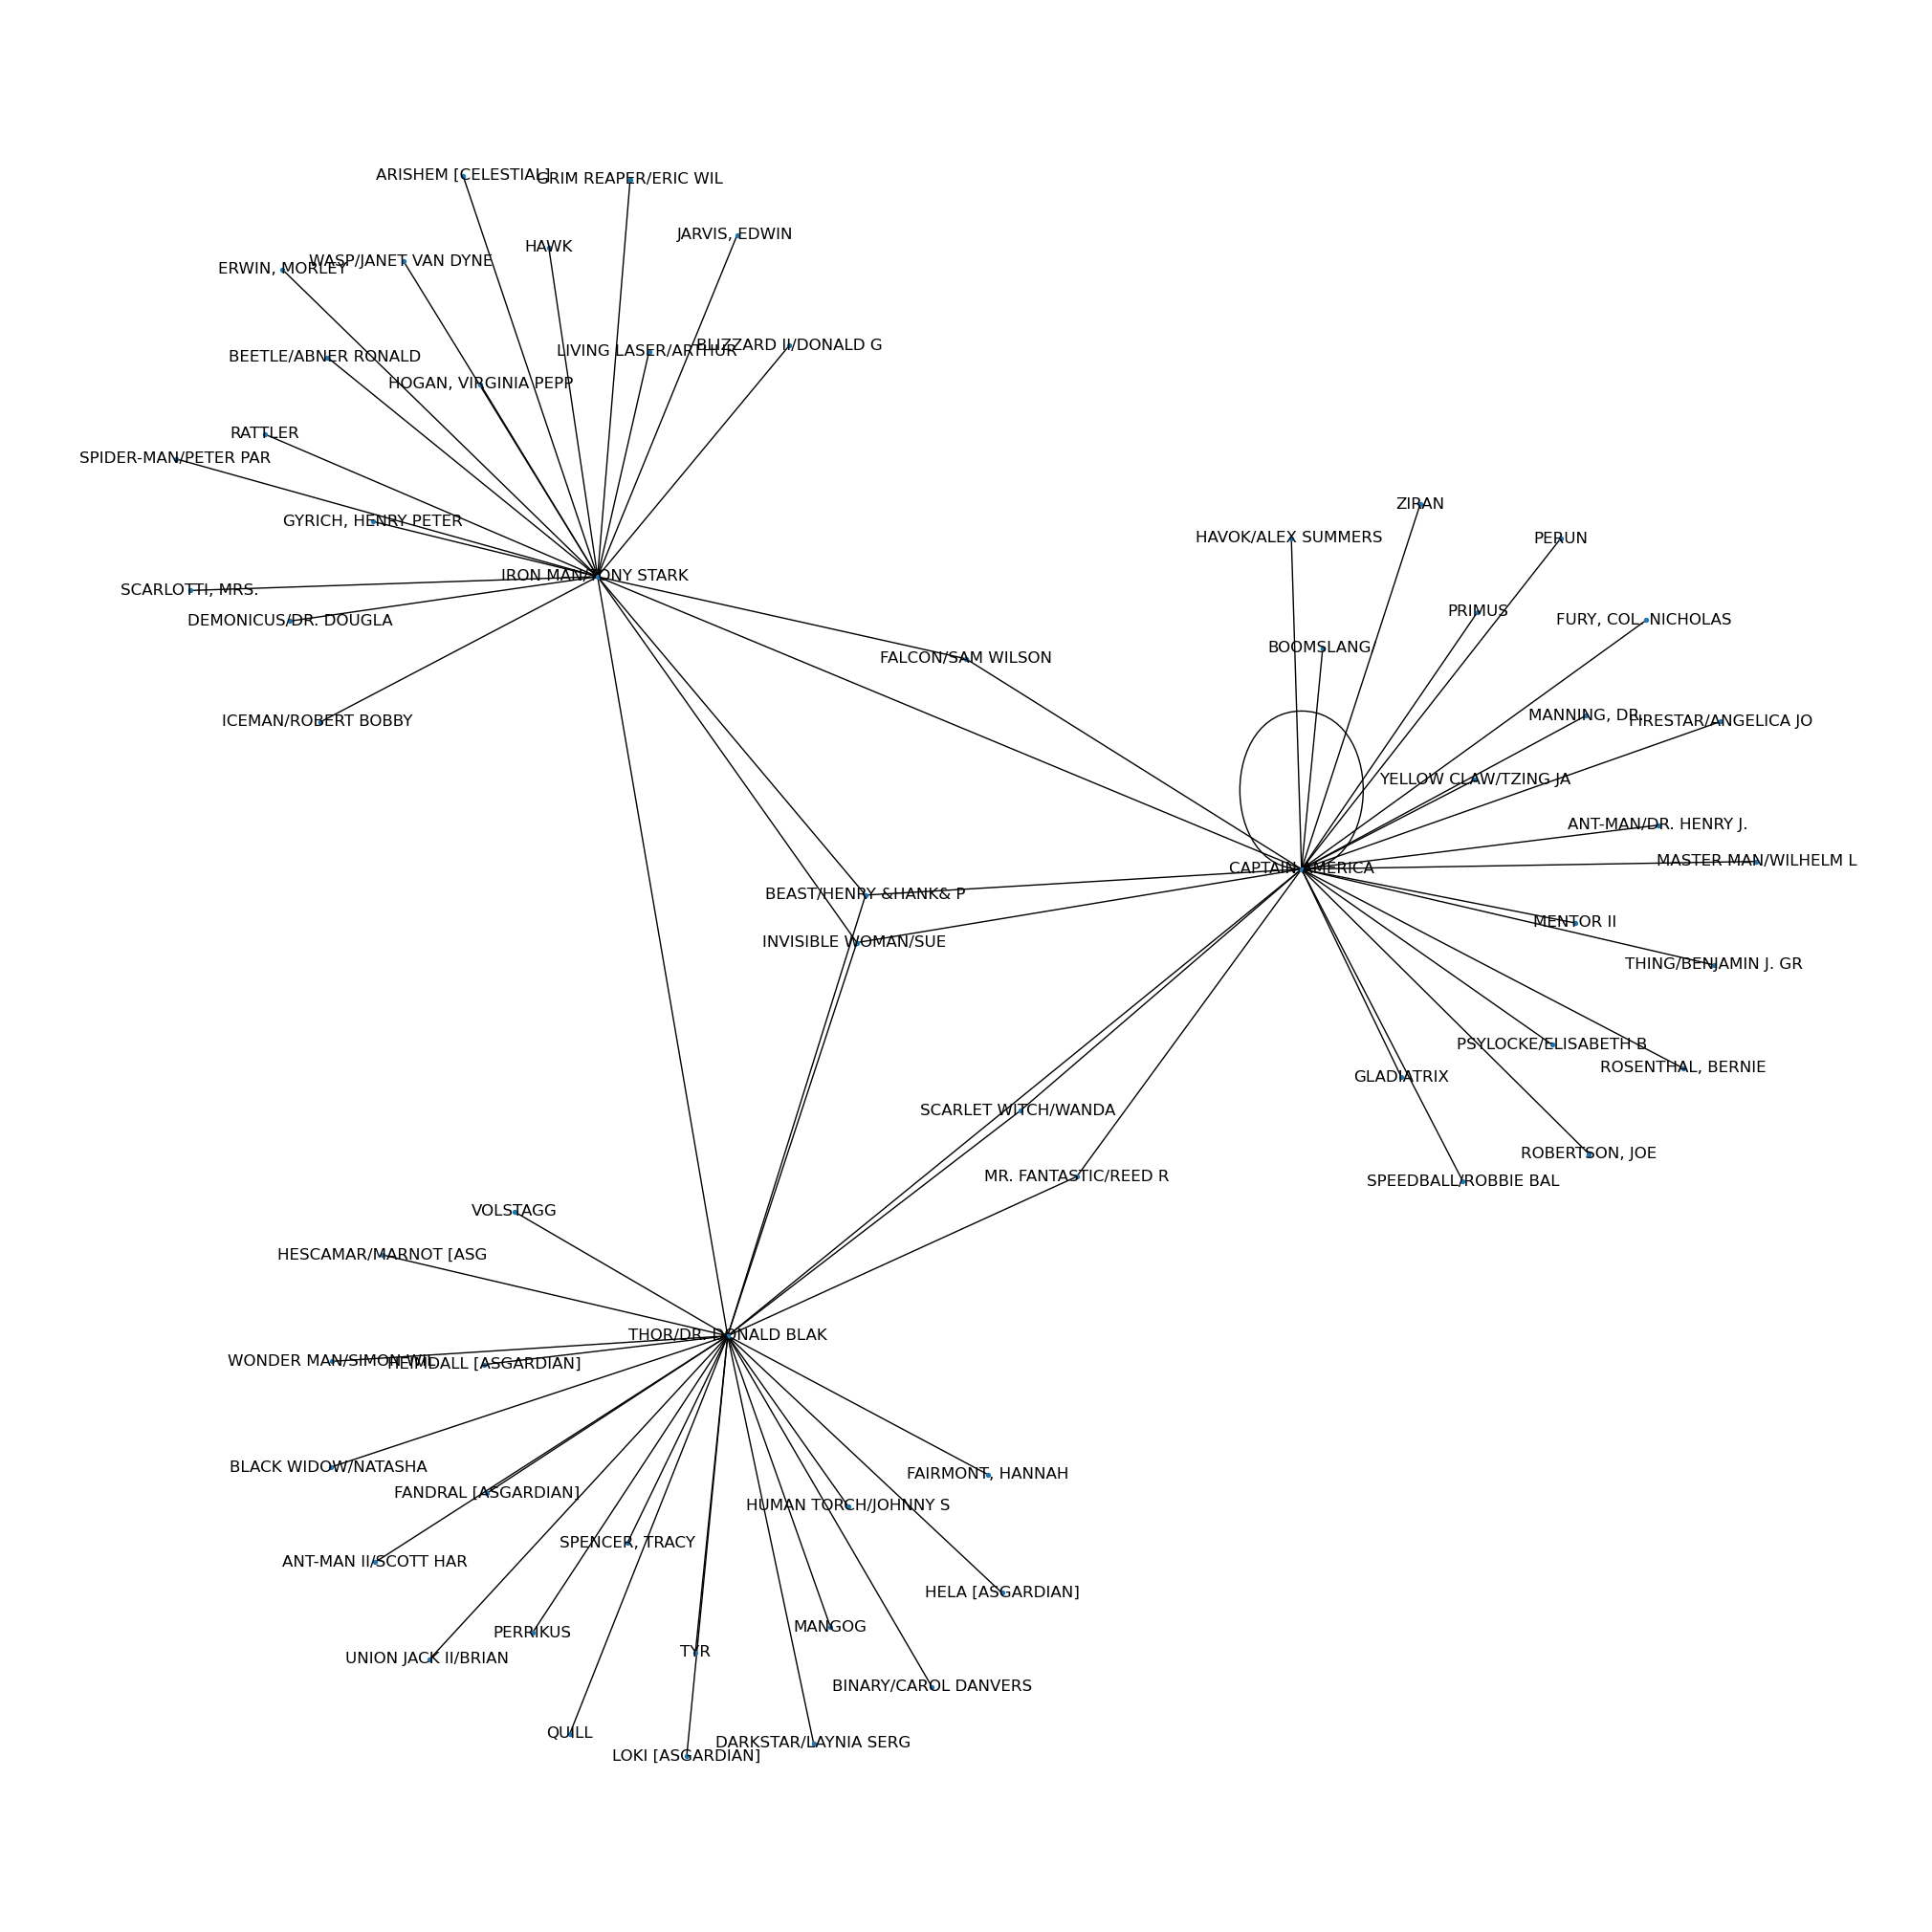

In [14]:
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

In [15]:
list(G.neighbors('CAPTAIN AMERICA'))

['THOR/DR. DONALD BLAK',
 'MENTOR II',
 'FALCON/SAM WILSON',
 'HAVOK/ALEX SUMMERS ',
 'BEAST/HENRY &HANK& P',
 'PERUN',
 'SCARLET WITCH/WANDA ',
 'SPEEDBALL/ROBBIE BAL',
 'GLADIATRIX',
 'CAPTAIN AMERICA',
 'PRIMUS',
 'INVISIBLE WOMAN/SUE ',
 'ZIRAN',
 'THING/BENJAMIN J. GR',
 'ROSENTHAL, BERNIE',
 'MR. FANTASTIC/REED R',
 'BOOMSLANG/',
 'MASTER MAN/WILHELM L',
 'ROBERTSON, JOE',
 'YELLOW CLAW/TZING JA',
 'ANT-MAN/DR. HENRY J.',
 'FIRESTAR/ANGELICA JO',
 'FURY, COL. NICHOLAS ',
 'PSYLOCKE/ELISABETH B',
 'MANNING, DR.',
 'IRON MAN/TONY STARK ']

In [16]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
[str(x) + '----' + str(y) for x,y in zip(G.nodes(),degrees)]

['THOR/DR. DONALD BLAK----25',
 'FAIRMONT, HANNAH----1',
 'SPENCER, TRACY----1',
 'MR. FANTASTIC/REED R----2',
 'CAPTAIN AMERICA----26',
 'DARKSTAR/LAYNIA SERG----1',
 'LOKI [ASGARDIAN]----1',
 'QUILL----1',
 'TYR----1',
 'HUMAN TORCH/JOHNNY S----1',
 'WONDER MAN/SIMON WIL----1',
 'BINARY/CAROL DANVERS----1',
 'PERRIKUS----1',
 'HESCAMAR/MARNOT [ASG----1',
 'MANGOG----1',
 'FANDRAL [ASGARDIAN]----1',
 'ANT-MAN II/SCOTT HAR----1',
 'INVISIBLE WOMAN/SUE ----3',
 'SCARLET WITCH/WANDA ----2',
 'HELA [ASGARDIAN]----1',
 'VOLSTAGG----1',
 'HEIMDALL [ASGARDIAN]----1',
 'BLACK WIDOW/NATASHA ----1',
 'BEAST/HENRY &HANK& P----3',
 'UNION JACK II/BRIAN ----1',
 'MENTOR II----1',
 'FALCON/SAM WILSON----2',
 'HAVOK/ALEX SUMMERS ----1',
 'PERUN----1',
 'SPEEDBALL/ROBBIE BAL----1',
 'GLADIATRIX----1',
 'PRIMUS----1',
 'ZIRAN----1',
 'THING/BENJAMIN J. GR----1',
 'ROSENTHAL, BERNIE----1',
 'BOOMSLANG/----1',
 'MASTER MAN/WILHELM L----1',
 'ROBERTSON, JOE----1',
 'YELLOW CLAW/TZING JA----1',
 'ANT-MAN/

In [17]:
edges_raw

hero1                 hero2
0              LITTLE, ABNER        PRINCESS ZANDA
1              LITTLE, ABNER  BLACK PANTHER/T'CHAL
2       BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3              LITTLE, ABNER        PRINCESS ZANDA
4              LITTLE, ABNER  BLACK PANTHER/T'CHAL
...                      ...                   ...
574462  COLOSSUS II/PETER RA              CALLISTO
574463              CALLISTO               ROGUE /
574464              CALLISTO              CALIBAN/
574465              CALIBAN/               ROGUE /
574466  HULK/DR. ROBERT BRUC     MARKS, DR. SHIELA

[574467 rows x 2 columns]

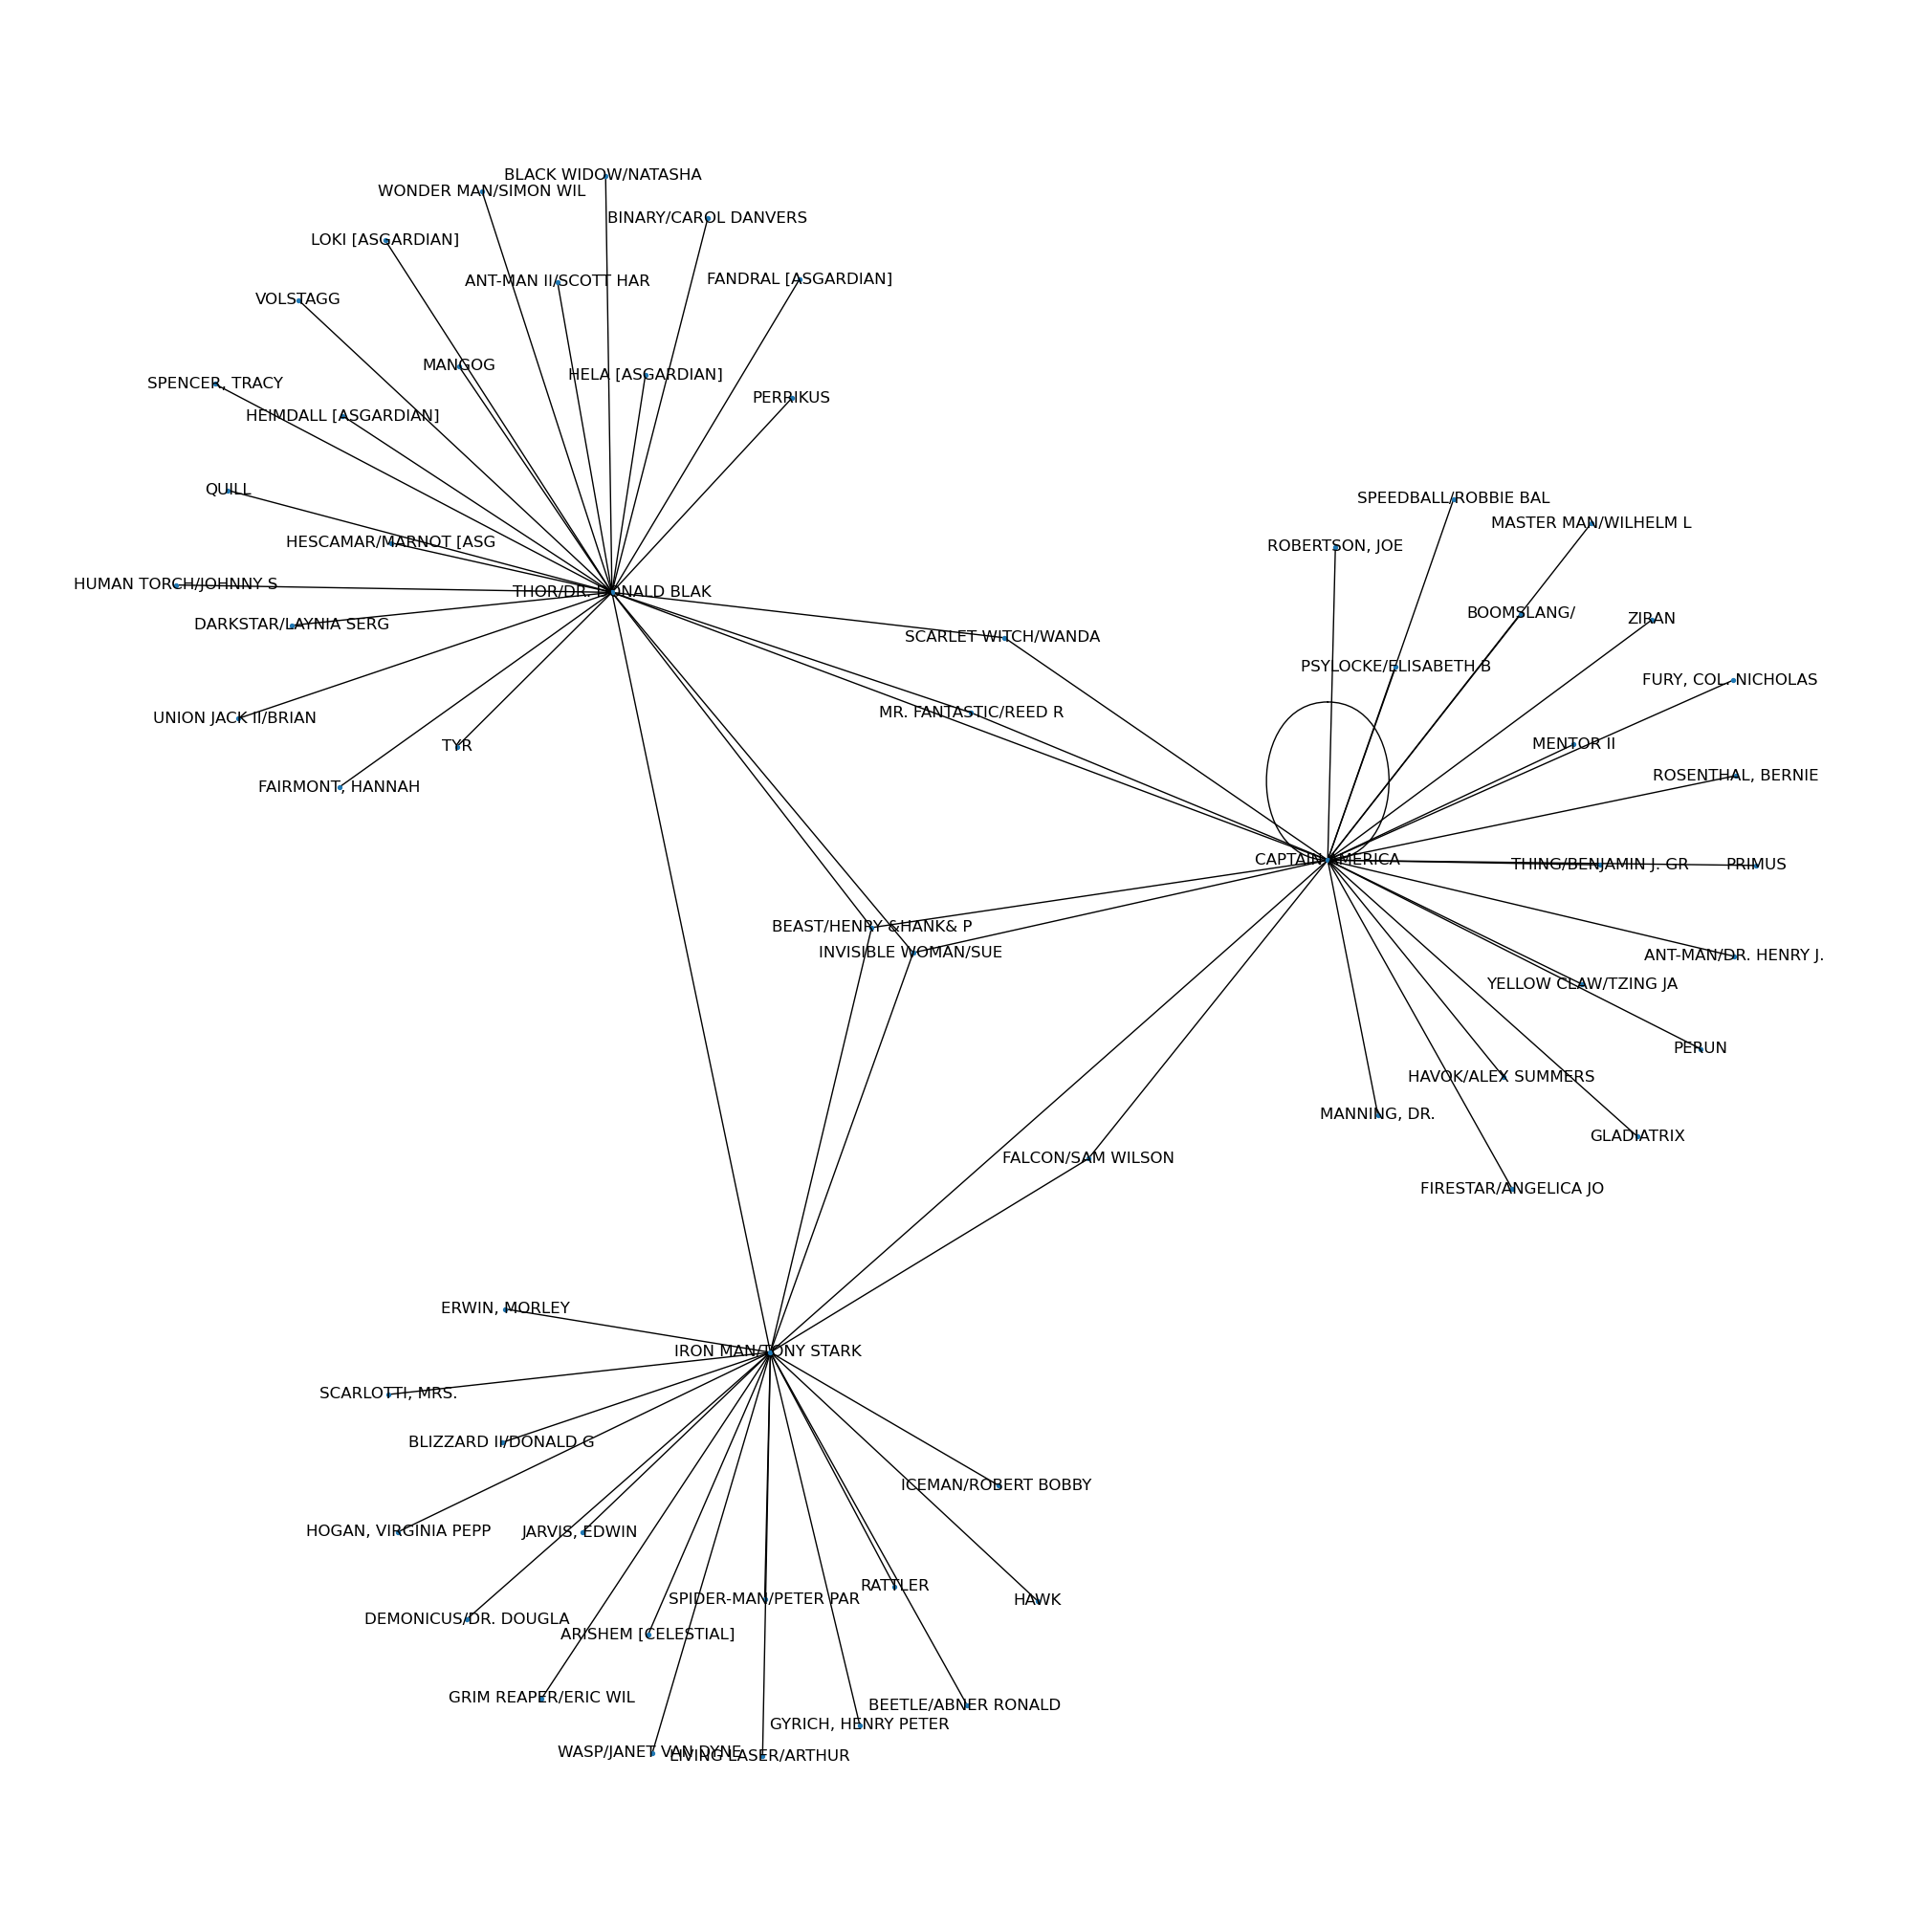

In [18]:
random.seed(42)
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

In [19]:
G = nx.Graph()

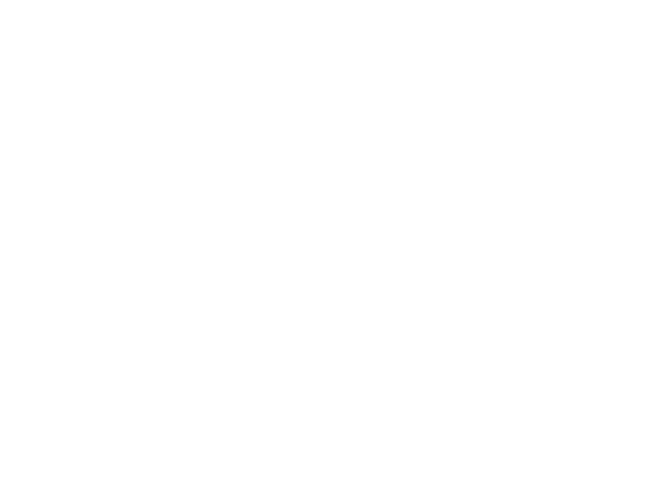

In [20]:
nx.draw(G, )